# How to curate and check seismic station metadata
31 May 2024

## Workflow for network curator
- getting metadata, validation, update
- Check https://docs.google.com/presentation/d/1uWYuXKbenMDSKq9-p8FcL_YXjVWAOTRUzNhQz02BVwk/edit#slide=id.g2266c1e2d61_0_44

## Responsibilities of network curator
- only validation of metadata, not of technical details
- Best practice, check seed manual (not strict)
- For EIDA: As long as the xml is valid, it is accepted
- Problematic raspberry shake metadata (Sensors get seed id by the organisation, and sensors move around)





## Tools that can be used (obspy, yasmin, smp …)
- Response info from NRL
- Try to phase out dataless
- Format of choice is StationXML or SeiscompXML

In [14]:
import xmlschema
if xmlschema.is_valid("./data/good_example.xml", "./data/fdsn-station-1.2.xsd"):
    print("Valid StationXML!")

Valid StationXML!


In [15]:
if xmlschema.is_valid("./data/bad_example.xml", "./data/fdsn-station-1.2.xsd"):
    print("Valid StationXML!")
else:
    try:
        xmlschema.validate("./data/bad_example.xml", "./data/fdsn-station-1.2.xsd")
    except xmlschema.XMLSchemaValidationError as validation_error:
        print(validation_error)

failed validating {'startDate': '2002-11-19T21:07:00Z'} with XsdAttributeGroup(['alternateCode', 'code', 'endDate', 'historicalCode', 'restrictedStatus', 'sourceID', 'startDate', XsdAnyAttribute(namespace=['##other'], process_contents='lax')]):

Reason: missing required attribute 'code'

Schema component:

  <xs:extension xmlns:xs="http://www.w3.org/2001/XMLSchema" base="fsx:BaseNodeType">
              <xs:sequence>
                  <xs:element name="Latitude" type="fsx:LatitudeType">
                      <xs:annotation>
      <xs:documentation>Station latitude, in degrees. Where the bulk of the equipment is located (or another appropriate site location).
    The unit is fixed to be degrees, and datum defaults to WGS84.
  </xs:documentation>
      <xs:documentation><example><Latitude>34.9459</Latitude></example></xs:documentation>
                      </xs:annotation>
                  </xs:element>
                  <xs:element name="Longitude" type="fsx:LongitudeType">
          


## How to mantain network quality
- Look at QC param
- Teleseismic events should have similar earth response at similar stations after instrument response removal (Ask Elmer for plot of amplitudes with faulty gain settions for instance)
- Single frequency over time of PPSD to check effect of response change


## Harvester – A very basic outline 

- Periodically checks datacenter FDSNWS
- Requirements:
    - FDSNWS-Station
    - Network DOI



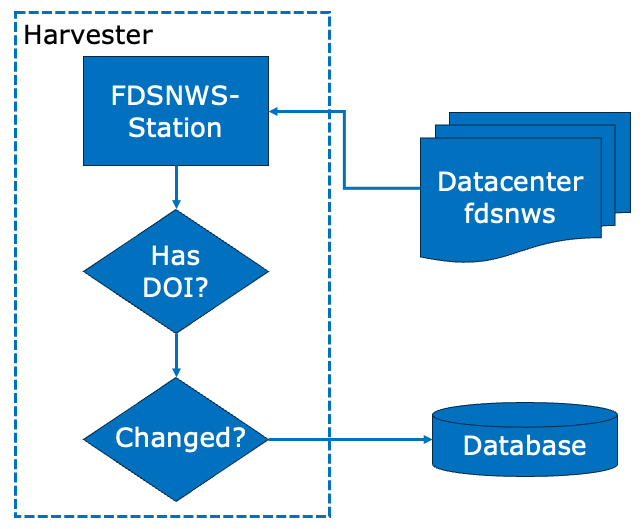

# API - Methods
- Query
    - Get station metadata change-log in a given time-window
- Metadata
    - Get station metadata at given timestamp
- Timeline
    - Get station metadata timeline


If someone is interested, we can share the code
- Needs fdsnws and docker
- Works with xmldiff or sicu

Jupyter notebook with examples
- For API (WIP: static, save with outputs)
- XML validation


## Changelog API example

In [10]:
import requests
from requests.adapters import HTTPAdapter

# Create http session
session = requests.Session()
session.mount("http://", HTTPAdapter())

In [2]:
# Request timeline of network
api_timeline_url = 'https://changelog-odc.sa.acc.knmi.cloud/timeline'
params = {'network': 'YL'}
resp = session.get(api_timeline_url, params=params)

In [11]:
import json

# Convert to list of dict
changelog = json.loads(resp.content)[0]

In [22]:
print(f"Network: {changelog['network_code']} \nDOI: {changelog['network_doi']}\n")

for station in changelog['stations']:
    print(f"Station: {station['station_code']}, Entries: {len(station['logs'])}")
    for log in station['logs']:
        print(log['timestamp'])
    print("")

Network: YL 
DOI: 10.12686/SED/NETWORKS/YL

Station: R06, Entries: 1
2024-05-11T22:48:43

Station: I05, Entries: 1
2024-05-11T22:48:44

Station: A03, Entries: 1
2024-05-11T22:48:46

Station: R07, Entries: 1
2024-05-11T22:48:49

Station: I11, Entries: 1
2024-05-11T22:48:50

Station: A01, Entries: 1
2024-05-11T22:48:52

Station: R12, Entries: 1
2024-05-11T22:48:54

Station: R03, Entries: 1
2024-05-11T22:48:56

Station: I10, Entries: 1
2024-05-11T22:48:58

Station: I12, Entries: 1
2024-05-11T22:49:00

Station: R08, Entries: 1
2024-05-11T22:49:04

Station: R01, Entries: 1
2024-05-11T22:49:07

Station: A14, Entries: 1
2024-05-11T22:49:08

Station: R05, Entries: 1
2024-05-11T22:49:10

Station: A02, Entries: 1
2024-05-11T22:49:13

Station: A10, Entries: 1
2024-05-11T22:49:15

Station: R09, Entries: 1
2024-05-11T22:49:19

Station: I01, Entries: 1
2024-05-11T22:49:21

Station: R11, Entries: 1
2024-05-11T22:49:23

Station: A08, Entries: 1
2024-05-11T22:49:25

Station: A04, Entries: 1
2024-05-11T